## TPC Benchmark - Summarize & Plot

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 1.0})

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

import config, history, analysis

### Set Results Directory for Analysis

In [2]:
%store -r results_dir

In [3]:
results_dir

'/home/colin/code/bq_snowflake_benchmark/results/results_bqsf_ds_100GB_01_test-02_2020-07-10_12:43:22.674894'

### Download Query Histories

In [4]:
(_df_sf_history_sq, 
 _df_sf_history_av) = history.sf_results(results_dir=results_dir)

In [5]:
_df_bq_history = history.bq_results(results_dir=results_dir)

BIGQUERY QUERY TEXT
select * from `region-us`.INFORMATION_SCHEMA.JOBS_BY_PROJECT where job_type = 'QUERY' and end_time between '2020-07-10 19:23:24' AND '2020-07-14 02:35:05'



### Summarize & Merge Results

In [6]:
summary = analysis.Summary(results_dir=results_dir)

In [7]:
summary.load()

In [8]:
summary.append_history()

In [9]:
summary.calculate()

In [10]:
summary.df.head()

,db,test,scale,source,cid,desc,query_n,seq_n,dt,dt_s,TB
0,sf,ds,100,ds_100GB_01,1,test-02,83,1,00:00:05.965000,5.965,0.000218
1,sf,ds,100,ds_100GB_01,1,test-02,32,1,00:00:01.062000,1.062,0.000052
2,sf,ds,100,ds_100GB_01,1,test-02,30,1,00:00:02.685000,2.685,0.000161
3,sf,ds,100,ds_100GB_01,1,test-02,92,1,00:00:05.412000,5.412,0.000997
4,sf,ds,100,ds_100GB_01,1,test-02,66,1,00:00:05.980000,5.980,0.001109


### Plot Results

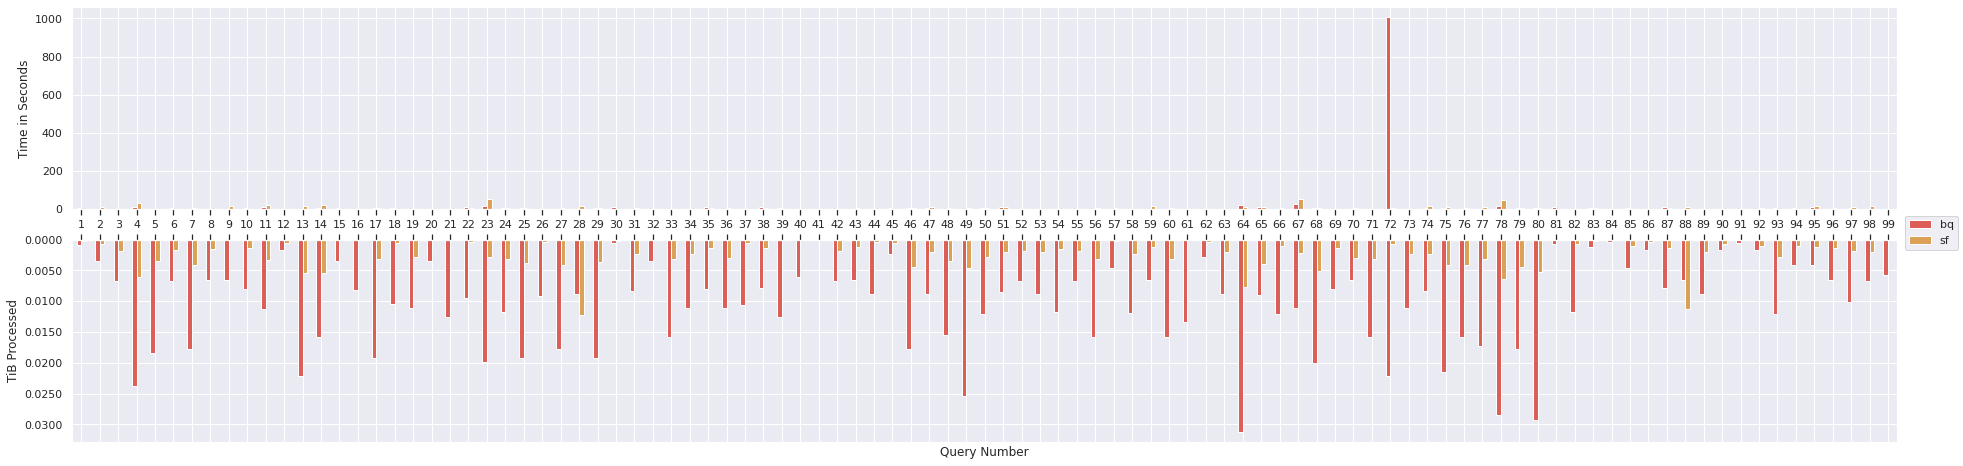

In [11]:
summary_plot = summary.per_query_plot()

In [12]:
df_summary_all = summary.summarize(summary_suffix="all")

In [13]:
df_summary_all

,db,test,dt_s,TB,scale,desc
0,BQ,DS,1447.312,1.038760,100GB,test-02
1,SF,DS,683.910,0.220954,100GB,test-02


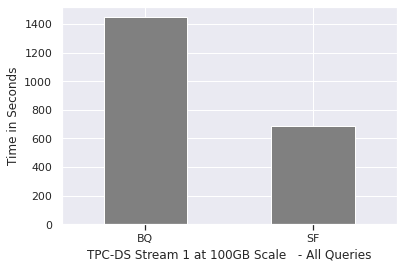

In [14]:
summary.plot_total_time(df_summary_all, suffix=" - All Queries");

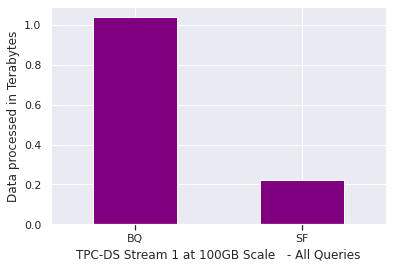

In [15]:
summary.plot_total_bytes(df_summary_all, suffix=" - All Queries");

### Plot Selective Exclusion of Query Results

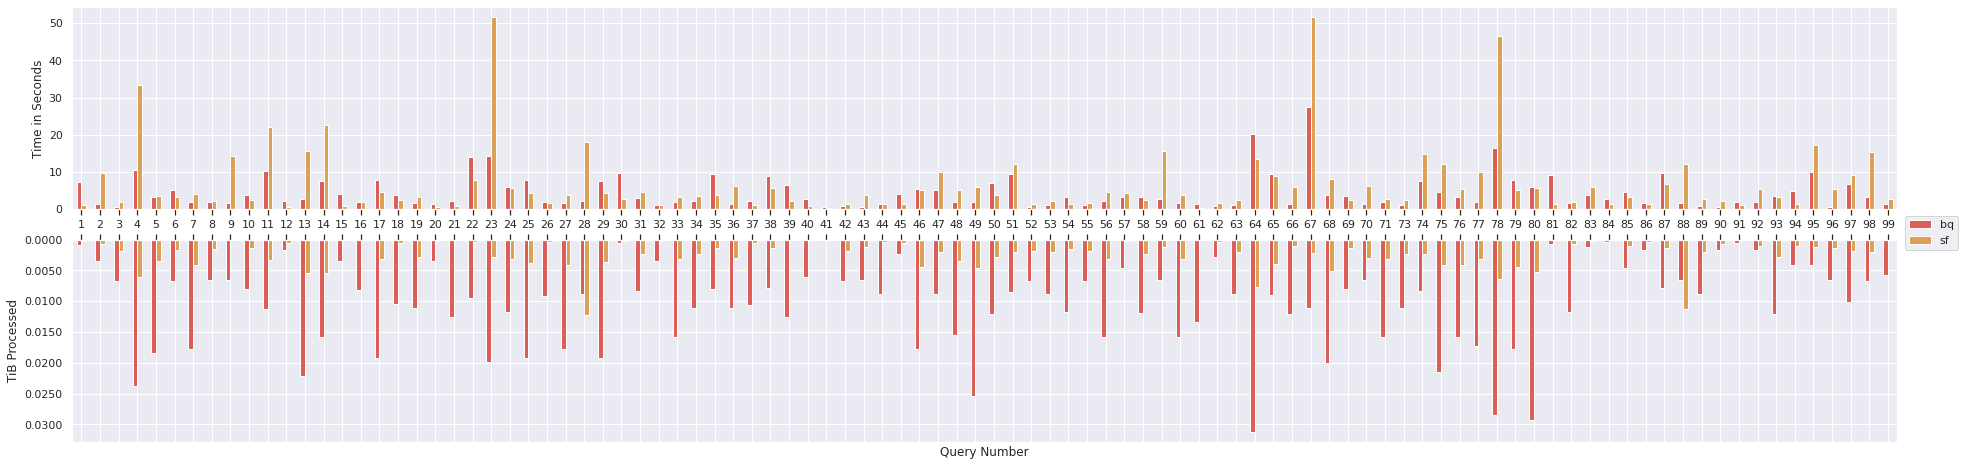

In [16]:
summary_plot = summary.per_query_plot(drop=[72])

In [17]:
df_summary_n72 = summary.summarize(drop=[72], summary_suffix="all")
df_summary_n72

,db,test,dt_s,TB,scale,desc
0,BQ,DS,437.383,1.016683,100GB,test-02
1,SF,DS,678.675,0.220173,100GB,test-02


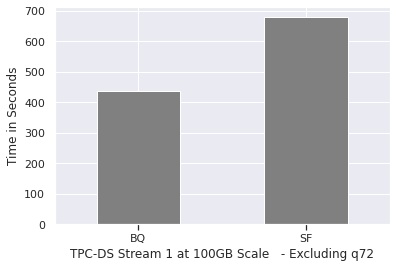

In [18]:
summary.plot_total_time(df_summary_n72, suffix=" - Excluding q72");

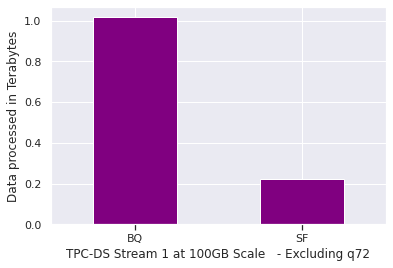

In [19]:
summary.plot_total_bytes(df_summary_n72, suffix=" - Excluding q72");